1. Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('comments.csv')

2. Dataset Description

In [3]:
df.head()

,text
0,This post is getting locked because all the ne...
1,"No, this behavior is not new. The Palestinian ..."
2,"Central European here.\nBefore, I was undecide..."
3,I was coming of age during the second intifada...
4,I side with Israel because I know I could go t...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102265 entries, 0 to 102264
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    102265 non-null  object
dtypes: object(1)
memory usage: 799.1+ KB


In [5]:
df.isnull().sum()

text    0
dtype: int64

In [6]:
df.columns

Index(['text'], dtype='object')

In [7]:
text_df = df.sample(8000)

In [8]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

The key tool Israel uses to implement the principle of Jewish supremacy is engineering space geographically, demographically and politically. Jews go about their lives in a single, contiguous space where they enjoy full rights and self-determination. In contrast, Palestinians live in a space that is fragmented into several units, each with a different set of rights – given or denied by Israel, but always inferior to the rights accorded to Jews.

The Israeli regime pursues this organizing principle in four major areas:

Land – Israel works to Judaize the entire area, treating land as a resource chiefly meant to benefit the Jewish population. Since 1948, Israel has taken over 90% of the land within the Green Line and built hundreds of communities for the Jewish population. Since 1967, Israel has also enacted this policy in the West Bank, building more than 280 settlements for some 600,000 Jewish Israeli citizens. Israel has not built a single community for the Palestinian population in t

In [9]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 85554 to 75454
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8000 non-null   object
dtypes: object(1)
memory usage: 125.0+ KB


3. Data Cleaning

In [10]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [11]:
text_df.text = text_df['text'].apply(data_processing)

In [12]:
text_df = text_df.drop_duplicates('text')

3. Text Processing

In [13]:
#stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [14]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [15]:
text_df.head()

,text
85554,key tool israel uses implement principle jewis...
18163,would situation different border soft
21831,think israel go ground risking lives attempt m...
32527,sure trying get op talking hamas israel things...
58152,consensus germanys second world war holocaust ...


In [16]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

key tool israel uses implement principle jewish supremacy engineering space geographically demographically politically jews go lives single contiguous space enjoy full rights selfdetermination contrast palestinians live space fragmented several units different set rights given denied israel always inferior rights accorded jews israeli regime pursues organizing principle four major areas land israel works judaize entire area treating land resource chiefly meant benefit jewish population since 1948 israel taken 90 land within green line built hundreds communities jewish population since 1967 israel also enacted policy west bank building 280 settlements 600000 jewish israeli citizens israel built single community palestinian population entire area stretching mediterranean sea jordan river exception several communities built concentrate bedouin population dispossessing property rights citizenship jews living anywhere world children grandchildren spouses entitled israeli citizenship contras

In [17]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7855 entries, 85554 to 75454
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7855 non-null   object
dtypes: object(1)
memory usage: 122.7+ KB


In [18]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [19]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [20]:
text_df.head(10)

,text,polarity
85554,key tool israel uses implement principle jewis...,0.040148
18163,would situation different border soft,0.050000
21831,think israel go ground risking lives attempt m...,-0.133333
32527,sure trying get op talking hamas israel things...,0.182576
58152,consensus germanys second world war holocaust ...,-0.071429
82754,im saying apartheid colloquial meaning essenti...,-0.125000
34979,propaganda bot edit check history tell im wrong,-0.300000
39298,maybe think part problem us holding many negot...,0.200000
79220,2 billion people hate israel jews would 0 reas...,-0.049138
45351,wait question desire kill jews inspired people...,0.000000


In [21]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [22]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [23]:
text_df.head()

,text,polarity,sentiment
85554,key tool israel uses implement principle jewis...,0.040148,Positive
18163,would situation different border soft,0.050000,Positive
21831,think israel go ground risking lives attempt m...,-0.133333,Negative
32527,sure trying get op talking hamas israel things...,0.182576,Positive
58152,consensus germanys second world war holocaust ...,-0.071429,Negative


5. Data Visualization

<Axes: xlabel='sentiment', ylabel='count'>

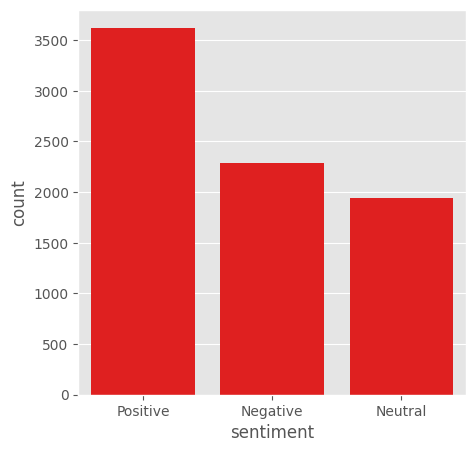

In [24]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data=text_df, color='red')


Text(0.5, 1.0, 'Distribution of sentiments')

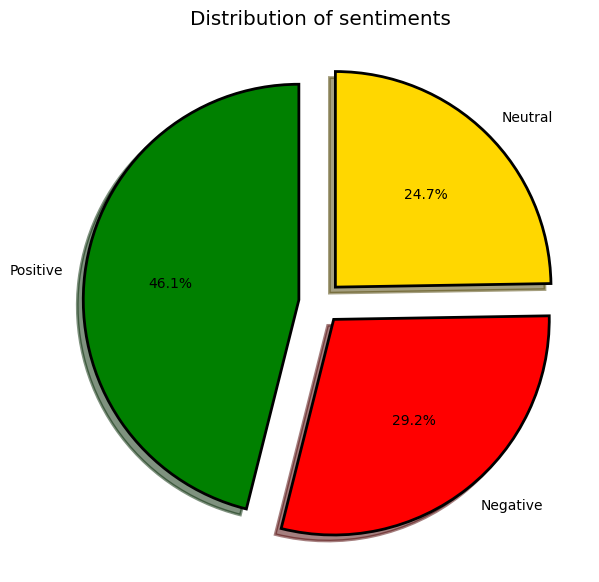

In [25]:
fig = plt.figure(figsize=(7,7))
colors = ("green", "red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [26]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
52716,name perfect,1.0,Positive
73924,awesome shirt tbh might get one,1.0,Positive
75566,understand perfectly hamas terrorist organizat...,1.0,Positive
64936,eyes way per discussion 2 states wont work tru...,1.0,Positive
62586,based keep fighting terrorism best wishes egypt,1.0,Positive


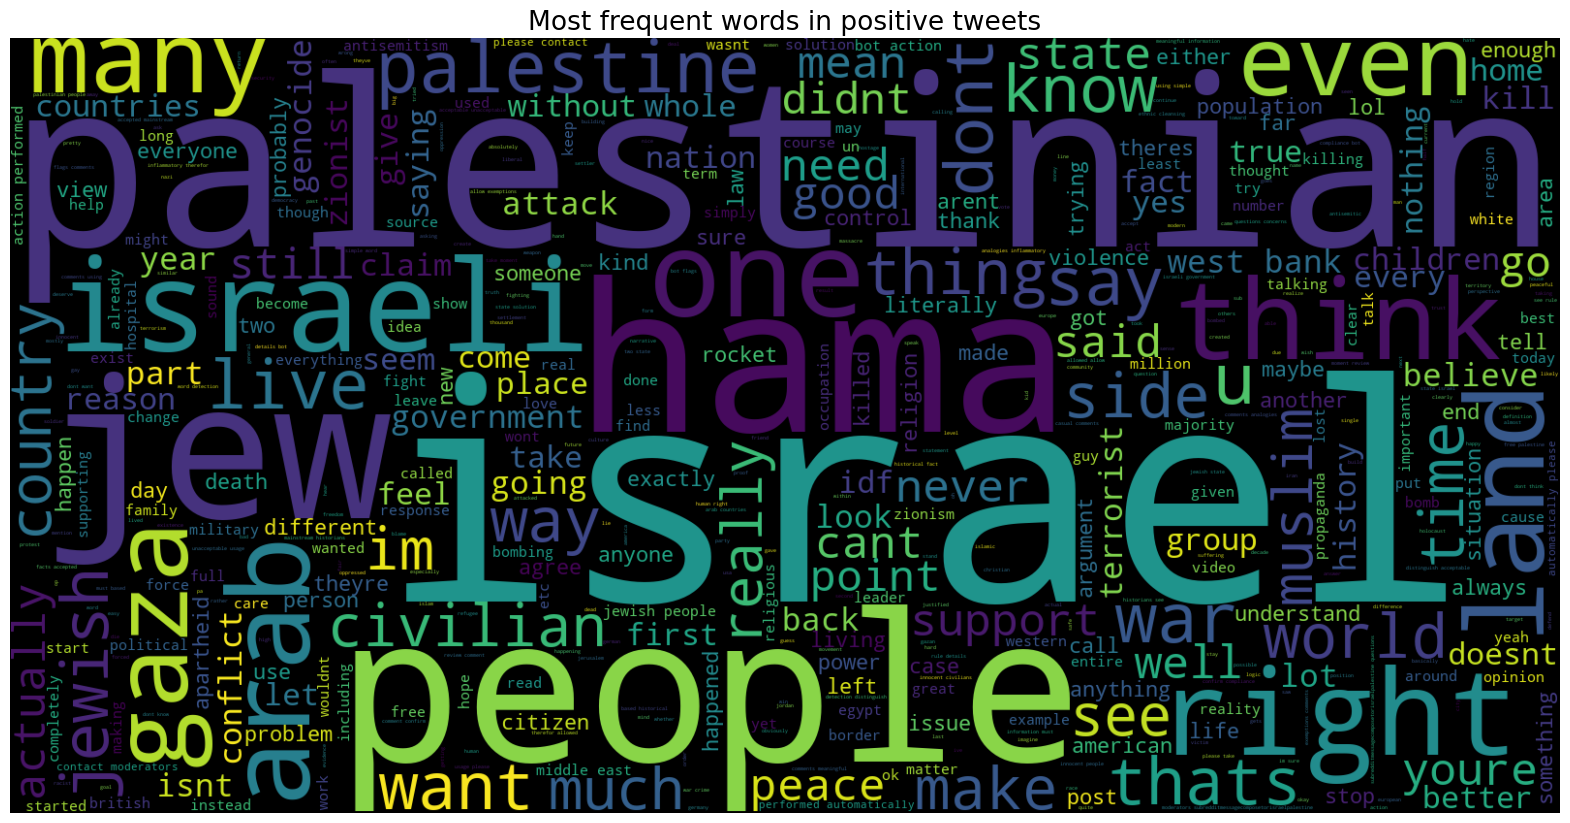

In [27]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [28]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
57587,true left country never move back riddled hate...,-1.009294e-17,Negative
52706,hamas didnt kill rape 1200 innocent jews hamas...,-1.586033e-17,Negative
98693,lmao dutch say ga maar lekker kapot van binnen...,-1.850372e-17,Negative
67222,agree reaction want israel hundreds hamas pale...,-1.850372e-17,Negative
26191,gave 1 anecdote 1 protestthat also hearsay go ...,-3.401361e-04,Negative


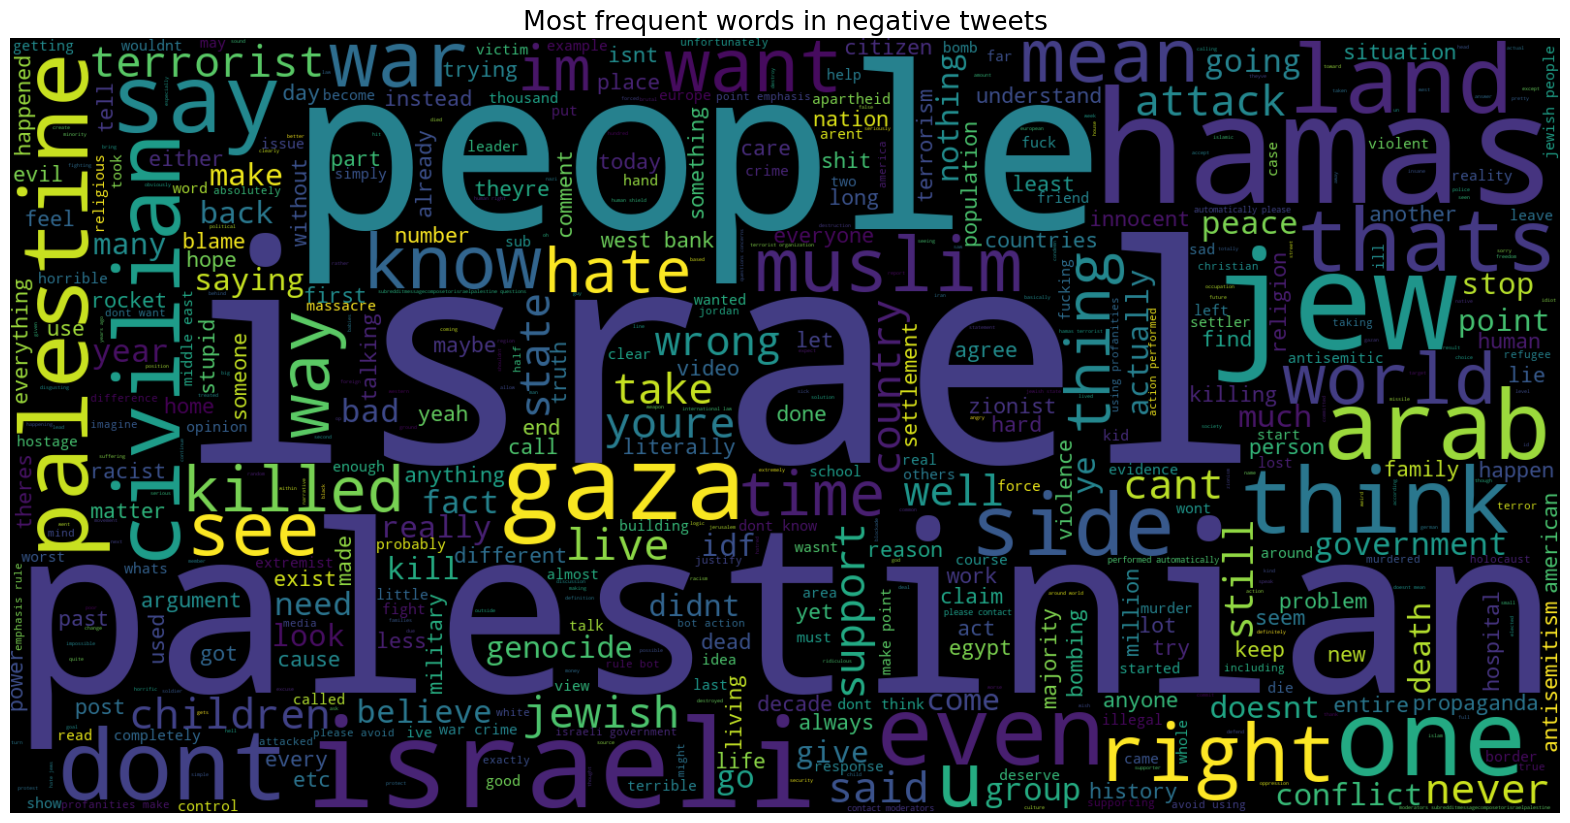

In [29]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [30]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
45351,wait question desire kill jews inspired people...,0.0,Neutral
10161,pray peace safety sides coexist possible,0.0,Neutral
90483,indeed aim,0.0,Neutral
1428,ashkenazi jews also semitic wonder telling dif...,0.0,Neutral
16366,settlers peace activists helped palestinians a...,0.0,Neutral


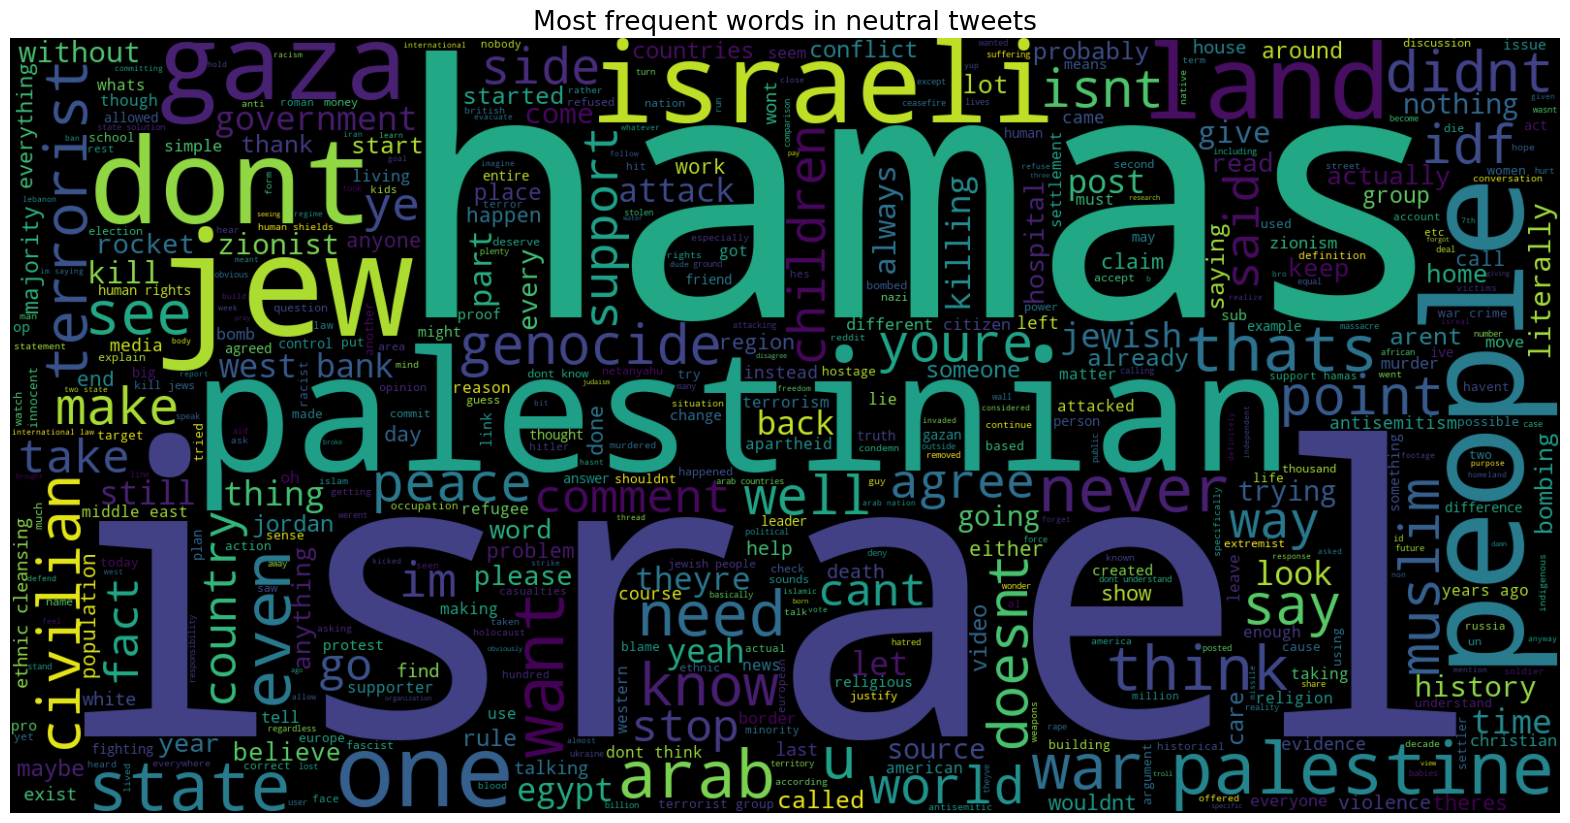

In [31]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

6. Data Encoding

In [32]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [33]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 178478

First 20 features:
 ['000' '000 hope' '0015' '0015 billion' '007' '007 budget' '007 federal'
 '00o00' '00o00 op' '02' '02 global' '02 population' '02 worlds' '03'
 '03 arguments' '04' '04 population' '05' '05 billion' '0710']


6. Model Training

In [34]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [66]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (4713, 178478)
Size of y_train: (4713,)
Size of x_test: (3142, 178478)
Size of y_test: (3142,)


In [67]:
import warnings
warnings.filterwarnings('ignore')

Logistic Regression

In [68]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 76.29%


Confusion Matrix (Logistic Regression)

In [69]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))
cr1 = classification_report(y_test, logreg_pred, output_dict=True)

[[ 562  183  201]
 [  31  674   54]
 [ 121  155 1161]]


              precision    recall  f1-score   support

    Negative       0.79      0.59      0.68       946
     Neutral       0.67      0.89      0.76       759
    Positive       0.82      0.81      0.81      1437

    accuracy                           0.76      3142
   macro avg       0.76      0.76      0.75      3142
weighted avg       0.77      0.76      0.76      3142



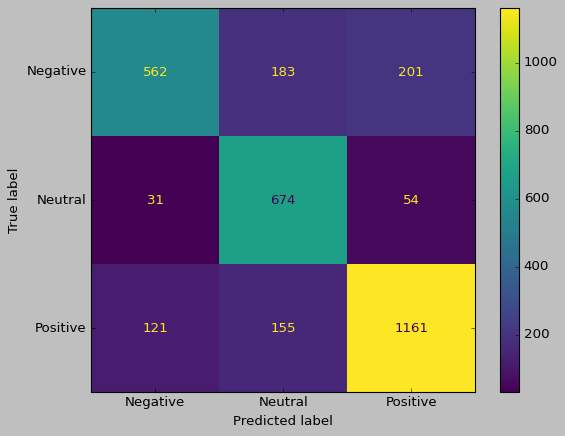

In [70]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

Tuned Logistic Regression

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [73]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [74]:
y_pred = grid.predict(x_test)

In [75]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 76.54%


Confusion Matrix (Tuned Logistic Regression)

In [76]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
cr2 = classification_report(y_test, y_pred, output_dict=True)

[[ 579  177  190]
 [  30  679   50]
 [ 131  159 1147]]


              precision    recall  f1-score   support

    Negative       0.78      0.61      0.69       946
     Neutral       0.67      0.89      0.77       759
    Positive       0.83      0.80      0.81      1437

    accuracy                           0.77      3142
   macro avg       0.76      0.77      0.75      3142
weighted avg       0.78      0.77      0.76      3142



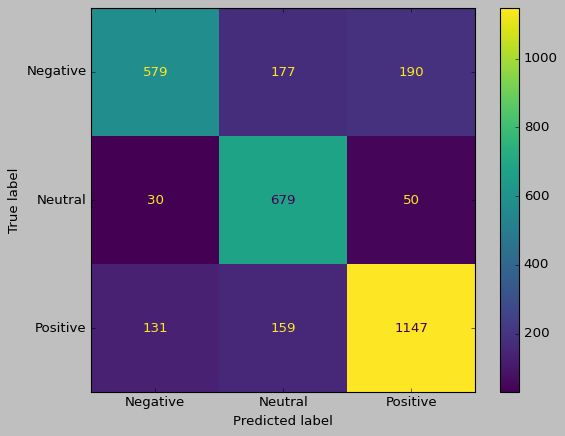

In [77]:
style.use('classic')
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

SVC

In [78]:
from sklearn.svm import LinearSVC

In [79]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [80]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 76.13%


Confusion Matrix (Linear SVC)

In [81]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))
cr3 = classification_report(y_test, svc_pred, output_dict=True)

[[ 562  202  182]
 [  23  702   34]
 [ 122  187 1128]]


              precision    recall  f1-score   support

    Negative       0.79      0.59      0.68       946
     Neutral       0.64      0.92      0.76       759
    Positive       0.84      0.78      0.81      1437

    accuracy                           0.76      3142
   macro avg       0.76      0.77      0.75      3142
weighted avg       0.78      0.76      0.76      3142



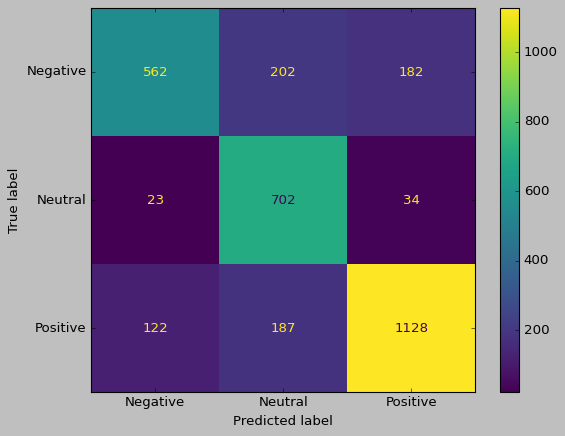

In [82]:
style.use('classic')
cm = confusion_matrix(y_test, svc_pred, labels=SVCmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=SVCmodel.classes_)
disp.plot()

Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
RFmodel = RandomForestClassifier()
RFmodel.fit(x_train, y_train)

RandomForestClassifier()

In [84]:
rf_pred = RFmodel.predict(x_test)
rf_acc = accuracy_score(rf_pred, y_test)
print("test accuracy: {:.2f}%".format(rf_acc*100))

test accuracy: 75.88%


In [85]:
print(confusion_matrix(y_test, rf_pred))
print("\n")
print(classification_report(y_test, rf_pred))
cr4 = classification_report(y_test, rf_pred, output_dict=True)

[[ 399  192  355]
 [   2  710   47]
 [  15  147 1275]]


              precision    recall  f1-score   support

    Negative       0.96      0.42      0.59       946
     Neutral       0.68      0.94      0.79       759
    Positive       0.76      0.89      0.82      1437

    accuracy                           0.76      3142
   macro avg       0.80      0.75      0.73      3142
weighted avg       0.80      0.76      0.74      3142



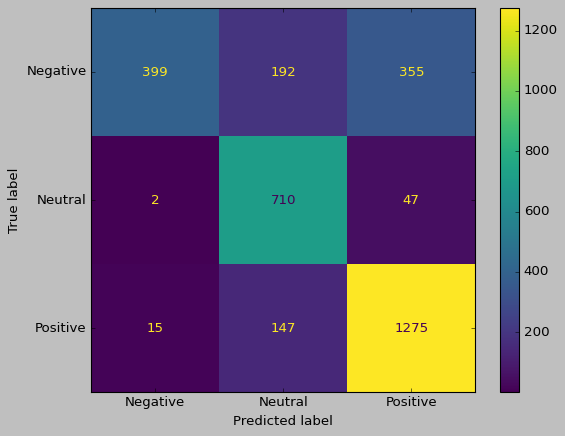

In [86]:
style.use('classic')
cm = confusion_matrix(y_test, rf_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
DTreeModel = DecisionTreeClassifier()
DTreeModel.fit(x_train, y_train)

DecisionTreeClassifier()

In [89]:
dtree_pred = DTreeModel.predict(x_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("test accuracy: {:.2f}%".format(dtree_acc*100))

test accuracy: 72.66%


In [90]:
print(confusion_matrix(y_test, dtree_pred))
print("\n")
print(classification_report(y_test, dtree_pred))
cr5 = classification_report(y_test, dtree_pred, output_dict=True)

[[ 536  133  277]
 [  40  667   52]
 [ 222  135 1080]]


              precision    recall  f1-score   support

    Negative       0.67      0.57      0.61       946
     Neutral       0.71      0.88      0.79       759
    Positive       0.77      0.75      0.76      1437

    accuracy                           0.73      3142
   macro avg       0.72      0.73      0.72      3142
weighted avg       0.73      0.73      0.72      3142



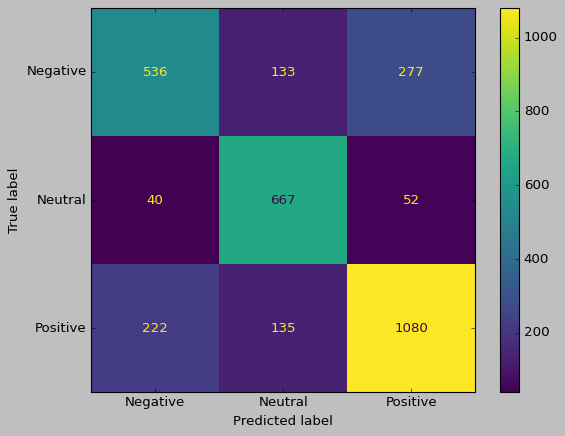

In [91]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

7. Graphical Comparison

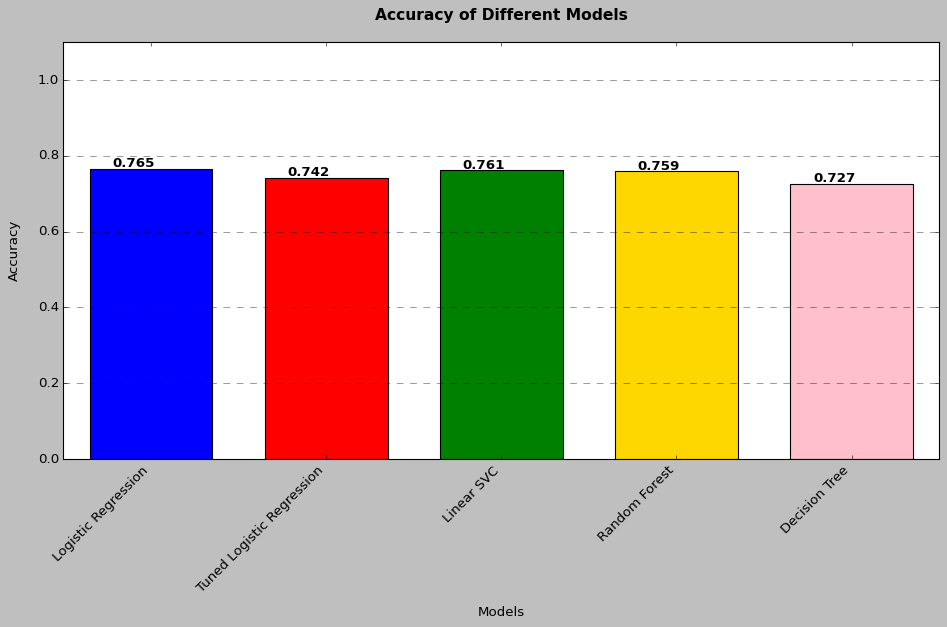

In [92]:
# Data
models = ['Logistic Regression', 'Tuned Logistic Regression', 'Linear SVC', 'Random Forest', 'Decision Tree']
accuracies = [logreg_acc, grid.best_score_, svc_acc, rf_acc, dtree_acc]

# Plotting
plt.figure(figsize=(12, 8))  # Increase the width of the figure
colors = ['blue', 'red', 'green', 'gold', 'pink']  # Assign colors to bars

# Leave some space at the left and right edges
plt.xlim(-0.5, len(models) - 0.5)

# Leave empty space at the top
plt.ylim(0, 1.1)

bars = plt.bar(models, accuracies, color=colors, alpha=1.0, width=0.7)  # Set alpha to 1.0 for complete opacity

# Adding data labels on each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, f'{acc:.3f}', ha='center', color='black', fontweight='bold')

# Adding labels and title
plt.xlabel('Models', fontsize=12, labelpad=10)
plt.ylabel('Accuracy', fontsize=12, labelpad=15)  # Increase the padding for the y-axis label
plt.title('Accuracy of Different Models', fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the aspect ratio of the plot to 'auto' to make the y-axis longer
plt.gca().set_aspect('auto')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()